# Yelp Business Rating Analysis

# Part 1: Loading data into MySQL database

#### Imported python modules

In [1]:
import pymysql as myDB

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import pandas.io.sql as pdsql

#### Connected to the MySQL local-host and create a database named “yelp_db”

In [ ]:
conn = myDB.connect(host='localhost',
                    user='root',
                    password='123456')

In [ ]:
conn.cursor().execute('create database yelp_db')

#### If database already exist, execute the following code in markdown or skip the creation step.

In [ ]:
conn.cursor().execute('drop database if exists yelp_db')

In [5]:
db = myDB.connect(host='localhost', user='root', passwd='123456', db='yelp_db')

In [7]:
conn = myDB.connect('localhost', 'root', '123456')
cursor = conn.cursor()

#### Showed all the databases in the MySQL local host and use the newly created database “yelp_db”

In [8]:
sql = ' SHOW DATABASES; '
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('information_schema',)
('MYFLTDATA',)
('mysql',)
('performance_schema',)
('sys',)
('yelp_db',)


In [9]:
sql = ' USE yelp_db; ' 
cursor.execute(sql)

0

In [10]:
sql = ' show tables; ' 
cursor.execute(sql)

11

# Part 2: Data Exploration

#### Select the first three rows in the review, business, checkin, photo, tip, user and attribute datasets and print the results

In [78]:
sql = '''
SELECT * FROM review LIMIT 3;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('----X0BIDP9tA49U3RvdSQ', 4, datetime.datetime(2014, 2, 17, 0, 0), "Red, white and bleu salad was super yum and a great addition to the menu! This location was clean with great service and food served at just the right temps! Kids pizza is always a hit too with lots of great side dish options for the kiddos! When I'm on this side of town, this will definitely be a spot I'll hit up again!", 0, 0, 0, 'Ue6-WhXvI-_1xUIuapl0zQ', 'gVmUR8rqUFdbSeZbsg6z_w')
('---0hl58W-sjVTKi5LghGw', 4, datetime.datetime(2016, 7, 24, 0, 0), 'Ate the momos during the momo crawl.. Was the best of the lot so decided to eat at the restaurant and the mutton thali was equally good!!', 0, 0, 0, 'Ae4ABFarGMaI5lk1i98A0w', 'Y6qylbHq8QJmaCRSlKdIog')
('---3OXpexMp0oAg77xWfYA', 5, datetime.datetime(2012, 4, 7, 0, 0), 'Pizza here made my night... Good people and great pizza. They can do anything you ask with a great attitude!', 2, 0, 0, 'lKq4Qsz13FDcAVgp49uukQ', 'SnXZkRN9Yf060pNTk1HMDg')


In [79]:
sql = '''
SELECT * FROM business LIMIT 3;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('--6MefnULPED_I942VcFNA', "John's Chinese BBQ Restaurant", '', '328 Highway 7 E, Chalmers Gate 11, Unit 10', 'Richmond Hill', 'ON', 'L4B 3P7', 43.8409, -79.3996, 3.0, 30, 1)
('--7zmmkVg-IMGaXbuVd0SQ', 'Primal Brewery', '', '16432 Old Statesville Rd', 'Huntersville', 'NC', '28078', 35.4371, -80.8437, 4.0, 42, 1)
('--8LPVSo5i0Oo61X01sV9A', 'Valley Bone and Joint Specialists', '', '3941 E Baseline Rd, Ste 102', 'Gilbert', 'AZ', '85234', 33.3795, -111.728, 4.5, 3, 1)


In [80]:
sql = '''
SELECT * FROM checkin LIMIT 3;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('7KPBkxAOEtb3QeIL9PEErg', 'Thursday-21:00', 4)
('7KPBkxAOEtb3QeIL9PEErg', 'Thursday-1:00', 1)
('7KPBkxAOEtb3QeIL9PEErg', 'Thursday-4:00', 1)


In [82]:
sql = '''
SELECT * FROM photo LIMIT 3;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('--0uqWanwN31OkuuwJ1zjQ', 'XIg92ukZJn_1aiNx0OmusQ', 'Le Gadboi: Poutine with pogos and onion rings.', 'food')
('--3gCyYz0Eo3r07tAvUbhg', 'VeiL_tgw7dsl-7IcnOsh0g', 'Their OMAKASE is AMAZING!!!!! Very recommended', 'food')
('--3vR19cePIkGQBgcLsQkw', 'If6Bku2jkgPiikR6HBu-XQ', 'Big steak omelette', 'food')


In [83]:
sql = '''
SELECT * FROM tip LIMIT 3;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('zcTZk7OG8ovAmh_fenH21g', 'tJRDll5yqpZwehenzE2cSg', 'Get here early enough to have dinner.', datetime.datetime(2012, 7, 15, 0, 0), 0)
('ZcLKXikTHYOnYt5VYRO5sg', 'jH19V2I9fIslnNhDzPmdkA', 'Great breakfast large portions and friendly waitress. I highly recommend it', datetime.datetime(2015, 8, 12, 0, 0), 0)
('oaYhjqBbh18ZhU0bpyzSuw', 'dAa0hB2yrnHzVmsCkN4YvQ', 'Nice place. Great staff.  A fixture in the township forever', datetime.datetime(2014, 6, 20, 0, 0), 0)


In [85]:
sql = '''
SELECT * FROM user LIMIT 3;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('---1lKK3aKOuomHnwAkAow', 'Monera', 245, datetime.datetime(2007, 6, 4, 0, 0), 67, 22, 9, 15, 3.97, 2, 3, 2, 1, 0, 5, 9, 9, 9, 9, 0)
('---94vtJ_5o_nikEs6hUjg', 'Joe', 2, datetime.datetime(2016, 5, 27, 0, 0), 0, 0, 0, 0, 5.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('---cu1hq55BP9DWVXXKHZg', 'Jeb', 57, datetime.datetime(2009, 4, 18, 0, 0), 34, 14, 0, 0, 3.79, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0)


In [86]:
sql = '''
SELECT * FROM attribute LIMIT 3;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('YDf95gJZaq05wvo7hTQbbQ', 'RestaurantsPriceRange2', '2')
('YDf95gJZaq05wvo7hTQbbQ', 'BusinessParking', '{"garage": false, "street": false, "validated": false, "lot": true, "valet": false}')
('YDf95gJZaq05wvo7hTQbbQ', 'BikeParking', '1')


In [77]:
cursor.close()
cursor = conn.cursor()

# Part 3: Is average rating in Yelp useful for every restaurant? 

### Total "Useful" counts by different stars

#### We grouped the total number of useful votes received by different stars in the review dataset and plotted a bar chart to show the count by star and a pie chart to show the proportion by star

In [13]:
useful_count = pdsql.read_sql('select stars, sum(useful) as usefuls from review where useful>0 group by stars;',conn)
print(useful_count)

   stars    usefuls
0      1   838496.0
1      2   463910.0
2      3   602440.0
3      4  1213650.0
4      5  1562942.0


Total usefuls: 4,681,438

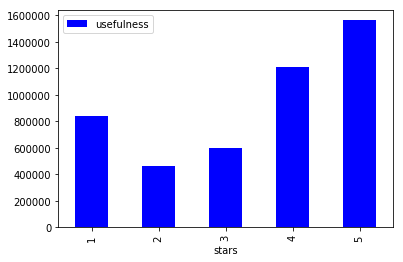

In [14]:
plt.clf()
useful_count.plot(kind='bar', x='stars', y='usefuls', label ='usefulness', color = 'blue')
plt.show()

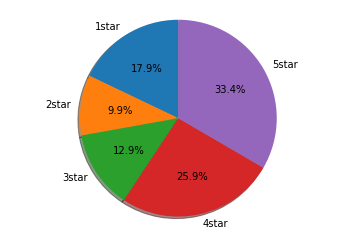

In [15]:
plt.clf()
labels = '1star', '2star', '3star', '4star', '5star'
sizes = useful_count.usefuls
explode = (0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [16]:
del useful_count

In [17]:
cursor.close()
cursor = conn.cursor()

### Total "Useful Reviews" count by different stars

#### We grouped the total number of useful reviews by different stars in the review dataset and plotted a bar chart to show the quantity by star and a pie chart to show the proportion by star

In [18]:
total_useful_review_count = pdsql.read_sql('select stars, count(*) as total_useful_r from review where useful>0 group by stars;',conn)
print(total_useful_review_count)

   stars  total_useful_r
0      1          327603
1      2          196108
2      3          251347
3      4          485089
4      5          721843


total useful review 1981990

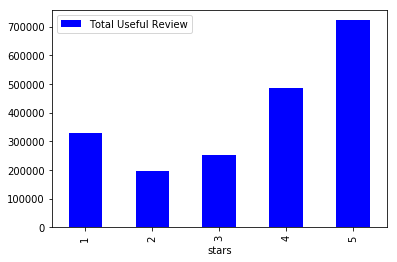

In [19]:
plt.clf()
total_useful_review_count.plot(kind='bar', x='stars', y='total_useful_r', label ='Total Useful Review', color = 'blue')
plt.show()

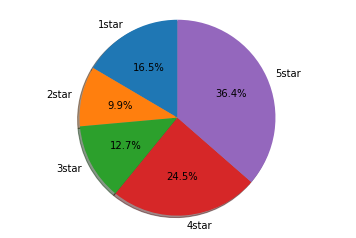

In [20]:
plt.clf()
labels = '1star', '2star', '3star', '4star', '5star'
sizes = total_useful_review_count.total_useful_r
explode = (0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [21]:
del total_useful_review_count

### Total "Review" counts by different stars

#### We grouped the total number of reviews by different stars in the review dataset and plotted a bar chart to show the count by star and a pie chart to show the proportion by star

In [22]:
total_review_count = pdsql.read_sql('select stars, count(*) as totalR from review group by stars;',conn)
print(total_review_count)

   stars   totalR
0      1   639849
1      2   402396
2      3   570819
3      4  1135830
4      5  1988003


Total reviews 4,736,897

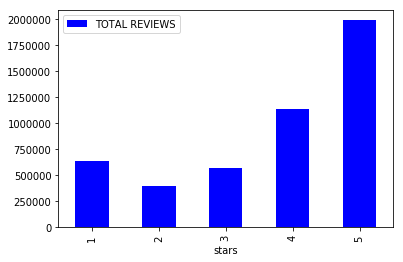

In [23]:
plt.clf()
total_review_count.plot(kind='bar', x='stars', y='totalR', label ='TOTAL REVIEWS', color = 'blue')
plt.show()

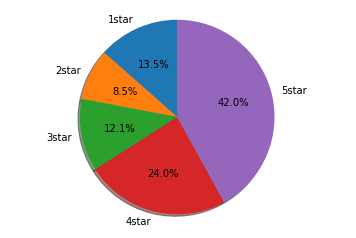

In [24]:
plt.clf()
labels = '1star', '2star', '3star', '4star', '5star'
sizes = total_review_count.totalR
explode = (0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 5 star reviews contributed to slightly lower than half of the total reviews. However, 5 star reviews are less useful than 1 star reviews since they contributed only 1/3 of the "Useful Reviews." We also see the opposite effect for 1 star reviews. Potentially, this is  beause people complain more about bad places than they praise good ones. Also, people may put more importance in avioding bad restaurants compared to selecting the perfect restaurant out of a long list of highly-rated restaurants. 

In [25]:
del total_review_count

In [26]:
cursor.close()
cursor = conn.cursor()

# Part 4: Do people go to 5 stars places more often? 

### Checkin and Stars

#### We created a temporary table named temp which contains the total number of check-in counts grouped by different businesses and the businesses’ corresponding star

In [29]:
sql=''' 
create table temp as 
(select sum(count) as total_checkin, stars
from checkin
join business on checkin.business_id = business.id
group by business_id
order by sum(count) desc);
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

#### We grouped the total number of check-ins of all the business by their different stars in the temp table and plotted a bar chart to show the count by star and a pie chart to show the proportion by star

In [30]:
cstar1 = pdsql.read_sql(' select sum(total_checkin) as ttlcheckin, stars from temp group by stars; ',conn)
print(cstar1)

   ttlcheckin  stars
0     14460.0    1.0
1     86867.0    1.5
2    317136.0    2.0
3    969137.0    2.5
4   2428887.0    3.0
5   4101479.0    3.5
6   5209824.0    4.0
7   2308746.0    4.5
8    379697.0    5.0


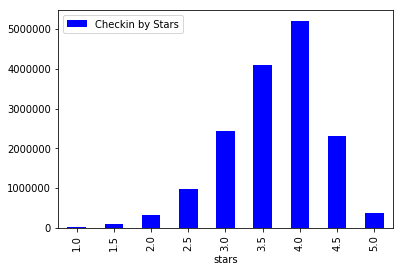

In [31]:
plt.clf()
cstar1.plot(kind='bar', x='stars', y='ttlcheckin', label ='Checkin by Stars', color = 'blue')
plt.show()

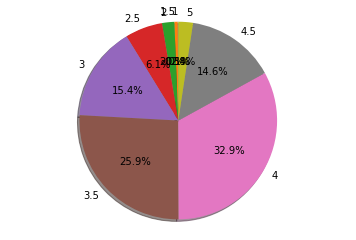

In [32]:
plt.clf()
labels = '1','1.5', '2','2.5','3','3.5','4','4.5','5'
sizes = cstar1.ttlcheckin
explode = (0, 0, 0, 0, 0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### From the chart, we can see people go to restaurants with 3.5 to 4.5 stars more often. It may be because many 5 star restaurants have very high prices and people don't think they deserve such a high price. Also, a prestigous restaurant with a great tradition could have a 5 star rating, but maybe the restaurant has not been living up to that reputation within the past few years.

In [33]:
del cstar1

In [34]:
sql='''drop table temp'''
cursor.execute(sql)

0

In [35]:
cursor.close()
cursor = conn.cursor()

# Part 5: Do more photos posted indicate high rating?

#### We selected the name of business, caption of the photo, and label of the photo from the joined table of business. We printed the first five rows where the label is “food.”

In [40]:
sql=''' 
select name, caption, label
from photo
join business on photo.business_id = business.id
where label = "food"
limit 5;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('Restaurant Greenspot', 'Le Gadboi: Poutine with pogos and onion rings.', 'food')
('Sushi Hiro', 'Their OMAKASE is AMAZING!!!!! Very recommended', 'food')
('IHOP', 'Big steak omelette', 'food')
('Shake Shack', '', 'food')
("Big B's Texas BBQ", 'Chocolate Cake 08/12/17 @endoedibles on Instagram for more', 'food')


#### We grouped the total number of labels by the name of business and showed the first ten rows

In [41]:
sql=''' 
select name, count(label) as num_pic
from photo
join business on photo.business_id = business.id
where label = "food"
group by name
order by num_pic desc
limit 10;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('Chipotle Mexican Grill', 1385)
('Symposium Cafe Restaurant & Lounge', 1314)
('Pizza Hut', 1115)
('El Pollo Loco', 1067)
("Filiberto's Mexican Food", 1014)
("Denny's", 819)
('KFC', 775)
('Pita Jungle', 751)
('Bacchanal Buffet', 742)
('First Watch - Breakfast, Brunch & Lunch', 664)


#### The restaurants having most pictures reviews are fast food restaurants, which was not what we expected. We wanted to see the bigger picture, so we continued this aspect of the analysis.

### Photo vs Rating

#### We created another temporary table named temp1 which contains business ID and total number of photos with the label “food.” Then, we grouped by different businesses in the descending order.

In [42]:
sql ='''
drop table if exists temp1;
'''
cursor.execute(sql)

/Users/xin/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning: (1051, "Unknown table 'yelp_db.temp1'")
  result = self._query(query)


0

In [43]:
sql=''' 
create table temp1 as 
(select photo.business_id as temp_business_id, count(label) as num_pic
from photo
join business on photo.business_id = business.id
where label = "food"
group by temp_business_id
order by num_pic desc);
'''
cursor.execute(sql)

#### We printed the top three business ID's with the highest number of photos.

In [44]:
sql=''' 
select temp_business_id, num_pic
from temp1
limit 3;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('RESDUcs7fIiihp38-d6_6g', 742)
('K7lWdNUhCbcnEvI0NhGewg', 418)
('faPVqws-x-5k2CQKDNtHxw', 339)


#### We grouped the total number of photos with the label “food” of all the businesses by the different stars from the joined table of temp1, business and photo. Then, we plotted a bar chart to show the count by star and a pie chart to show the proportion by star

In [45]:
sql=''' 
select sum(num_pic), stars
from temp1
join business on temp1.temp_business_id = business.id
join photo on temp1.temp_business_id = photo.business_id
where label = "food"
group by stars;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

(Decimal('7627'), 1.0)
(Decimal('9339'), 1.5)
(Decimal('33111'), 2.0)
(Decimal('134782'), 2.5)
(Decimal('307643'), 3.0)
(Decimal('794802'), 3.5)
(Decimal('1788548'), 4.0)
(Decimal('988460'), 4.5)
(Decimal('38707'), 5.0)


In [46]:
numpic_star = pdsql.read_sql(' select sum(num_pic) as sum_pic, stars from temp1 join business on temp1.temp_business_id = business.id join photo on temp1.temp_business_id = photo.business_id where label = "food" group by stars; ',conn)
print(numpic_star)

     sum_pic  stars
0     7627.0    1.0
1     9339.0    1.5
2    33111.0    2.0
3   134782.0    2.5
4   307643.0    3.0
5   794802.0    3.5
6  1788548.0    4.0
7   988460.0    4.5
8    38707.0    5.0


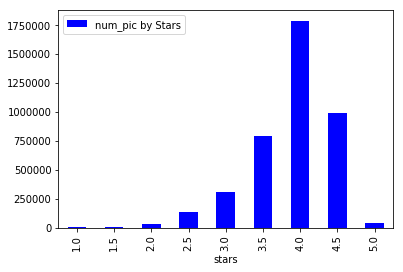

In [47]:
import matplotlib.pyplot as plt
plt.clf()
numpic_star.plot(kind='bar', x='stars', y='sum_pic', label ='num_pic by Stars', color = 'blue')
plt.show()

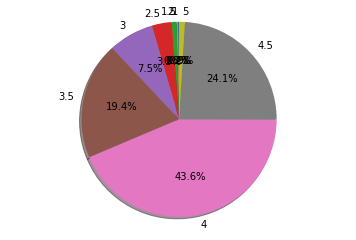

In [48]:
labels = '1','1.5', '2','2.5','3','3.5','4','4.5','5'
sizes = numpic_star.sum_pic
explode = (0, 0, 0, 0, 0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 4 star restaurants get more photos posted compared to 5 star restaurants. However, it is interesting that 3.5 star restaurants get more checkins and photos posted rather than 4.5 star restaurants. The number of pictures posted is not a good indicator for quality of service, but it is an indicator for popularity because it trends well with check-ins.

In [49]:
del numpic_star

In [50]:
sql='''drop table temp1'''
cursor.execute(sql)

0

In [51]:
cursor.close()
cursor = conn.cursor()

#### Now we can see that 4 star restaurants have the most pictures posted.  

# Part 6: Text analysis of tips for one star restaurants

#### For 1 star rated restaurants, we selected the name of business, business ID, and text of the tip for the business from the joined table of business and tip to show the top ten rows

In [73]:
sql=''' 
select name, business_id, stars, text
from tip
join business on tip.business_id = business.id
where stars = 1
limit 10;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('August Moon Chinese Restaurant', '-2v6N3EZAE4VDkAf7q3CrA', 1.0, 'For Vaughan this is as close to Chinese food you can get lol.')
("McDonald's", '-8PU0Z4Q2Nc-sY0eBj4DiQ', 1.0, 'WARNING  - the new cheese sticks are little lead bullets of disappointment. There is no gooey cheesiness even when piping hot.')
('Dollar General', '-H49o1OyiCgTsLjsiDNISA', 1.0, 'Come early to avoid lines')
('Bank of America', '-hjzsYoPYL6_HD1uuh2laA', 1.0, 'Changed')
('Best Buy Scooters', '-KjiHySwXNCreoD01z-irA', 1.0, 'Great store, great prices \nSales person was very helpful and knowledgeable.')
('201 West', '-krioyG0QCtBH81hU56Ghw', 1.0, 'RUN.')
('201 West', '-krioyG0QCtBH81hU56Ghw', 1.0, 'run like your hair is on fire!')
('201 West', '-krioyG0QCtBH81hU56Ghw', 1.0, 'Do not move here!!!!!!')
('201 West', '-krioyG0QCtBH81hU56Ghw', 1.0, 'Do not live here!!!')
('Century Parkside Apartments', '-Lw8Ve0NLbR0djHGw2fMOA', 1.0, 'The reviews are hilarious. Green space nicely manicured. They have a pool and tennis cou

#### We extracted the text written for 1 star restaurants from the Tips to show the first ten texts

In [54]:
sql=''' 
select text
from tip
join business on tip.business_id = business.id
where business.stars = 1
limit 10;
'''
cursor.execute(sql)
result = cursor.fetchall() 
for row in result:
    print(row)

('For Vaughan this is as close to Chinese food you can get lol.',)
('WARNING  - the new cheese sticks are little lead bullets of disappointment. There is no gooey cheesiness even when piping hot.',)
('Come early to avoid lines',)
('Changed',)
('Great store, great prices \nSales person was very helpful and knowledgeable.',)
('RUN.',)
('run like your hair is on fire!',)
('Do not move here!!!!!!',)
('Do not live here!!!',)
('The reviews are hilarious. Green space nicely manicured. They have a pool and tennis courts.',)


#### We saved the content of the text to "tip_for_1star.txt" and reloaded the file into Jupyter notebook

In [55]:
tip_for_1star = pdsql.read_sql('select text from tip join business on tip.business_id = business.id where business.stars = 1;',conn)

In [56]:
tip_for_1star.to_csv('tip_for_1star.txt', index = False)

In [57]:
pd.read_csv('tip_for_1star.txt').head()

,text
0,For Vaughan this is as close to Chinese food y...
1,WARNING - the new cheese sticks are little le...
2,Come early to avoid lines
3,Changed
4,"Great store, great prices \nSales person was v..."


In [58]:
del tip_for_1star

#### We split the text word for word and printed out the frequency of the words in descending order

In [76]:
!grep -oE '\w{{3,}}' tip_for_1star.txt | grep -v '^[0-9]' | tr '[:upper:]' '[:lower:]' | sort | uniq -c | sort -rn | head -20

1138 the
 816 and
 475 you
 446 they
 404 for
 397 this
 339 not
 222 was
 220 have
 213 are
 211 don
 201 service
 191 your
 185 with
 179 here
 177 that
 170 place
 142 get
 141 from
 123 time


#### The original word count shows several stopwords. We useed nltk package to get rid of the popular stopwords.

In [61]:
import nltk

#### We downloaded the nltk package to analyze stopwords.

import nltk
nltk.download()

In [62]:
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#### We selected the words in "tip_for_1star.txt" that are not stop words and saved them in “filteredtext.txt”

In [71]:
stop_words = set(stopwords.words('english'))
file1 = open("tip_for_1star.txt")
line = file1.read()# Use this to read file content as a stream:
words = line.split()
for r in words:
    if r.lower() not in stop_words:
        appendFile = open('filteredtext.txt','a')
        appendFile.write(" "+r)
        appendFile.close()

#### We filtered the tips for 1 star businesses using nltk.stopwords as a filter and placed the results into a new txt file named "filtererdtext.txt".

In [65]:
print(stop_words)

{'hadn', 'haven', 'by', 'as', 'over', 'who', 'itself', 'all', 'or', 'from', 'only', 'it', 'on', 'does', 'some', 'until', 'y', 'which', 'have', 'to', 'same', 'for', 'just', 'once', 'most', 'd', 'has', 'up', 'do', 'about', 'was', 'couldn', 'these', 'him', 'being', 'yourselves', 'but', 'o', 'out', 'because', 'we', 'now', 'her', 'more', 'our', 'ourselves', 'this', 'through', 'a', 'hers', 'isn', 'any', 'shouldn', 'she', 'am', 'if', 'himself', 'yours', 'whom', 'his', 'between', 'then', 'don', 'ain', 'that', 'above', 'other', 'should', 'here', 'are', 'did', 'mightn', 'during', 'been', 'can', 'i', 'yourself', 'both', 'own', 'didn', 'very', 'wasn', 'mustn', 't', 'in', 'with', 'further', 're', 'nor', 'themselves', 'after', 'off', 'them', 'shan', 'down', 'such', 'll', 'when', 'me', 'were', 'while', 'an', 'their', 'herself', 'aren', 'than', 'and', 'is', 'myself', 'what', 'its', 'wouldn', 'how', 'too', 'again', 'few', 'why', 've', 'those', 'each', 'there', 'had', 'of', 'your', 'hasn', 'they', 'he',

In [68]:
filteredword = open("filteredtext.txt").readlines()

#### We sorted the top 30 common words in “filteredtext.txt” to see that Service is one of the most frequently mentioned words for comments of 1 star restaurants.

In [109]:
!grep -oE '\w{{3,}}' filteredtext.txt | grep -v '^[0-9]' | tr '[:upper:]' '[:lower:]' | sort | uniq -c | sort -rn | head -30

 211 don
 201 service
 170 place
 142 get
 123 time
 115 company
  99 here
  98 one
  96 never
  95 ever
  83 worst
  80 good
  79 horrible
  77 car
  77 away
  76 people
  75 money
  75 like
  71 you
  71 stay
  71 customer
  68 would
  68 use
  66 even
  66 business
  66 back
  65 great
  65 food
  64 bad
  62 staff


#### We discovered that "don't", "service", "place" and "time" are commonly referenced in reviews for 1 star restaurants, so we recommend business owners to improve their customer service, enviroment and delivery time to improve their overall rating.